In [3]:
# setup all the library
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [4]:
# Create the file that will save all of the figures you want
DIR = "."
CHAPTER_ID = "landscape"
image_path = os.path.join(DIR, "images", CHAPTER_ID)
print(image_path)
os.makedirs(image_path, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(image_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


.\images\landscape


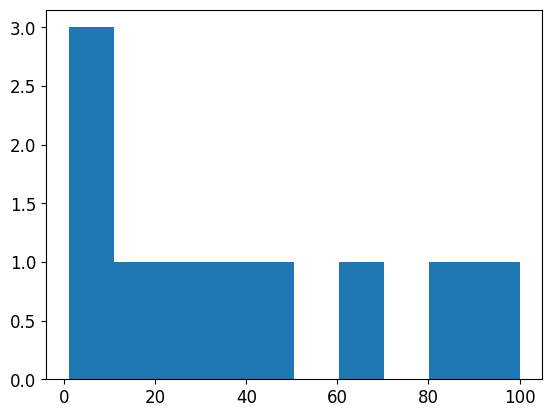

In [5]:
# import matplotlib.pyplot as plt

# # Create subplots
# fig, axes = plt.subplots(3,3)

# # ... Plotting and configuring the subplots ...

# # Adjust the layout
# # plt.tight_layout()

# # Show the plot
# plt.show()

x =[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
plt.hist(x)
  
# saving the figure.
# plt.savefig("squares1.png",
#             bbox_inches ="tight",
#             pad_inches = 1,
#             transparent = True,
#             facecolor ="g",
#             edgecolor ='w',
#             orientation ='landscape')
  
plt.show()


In [6]:
import pandas as pd

housing = pd.read_csv(".\datasets\housing\housing.csv")
# housing.head()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing["longitude"].value_counts

<bound method IndexOpsMixin.value_counts of 0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64>

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


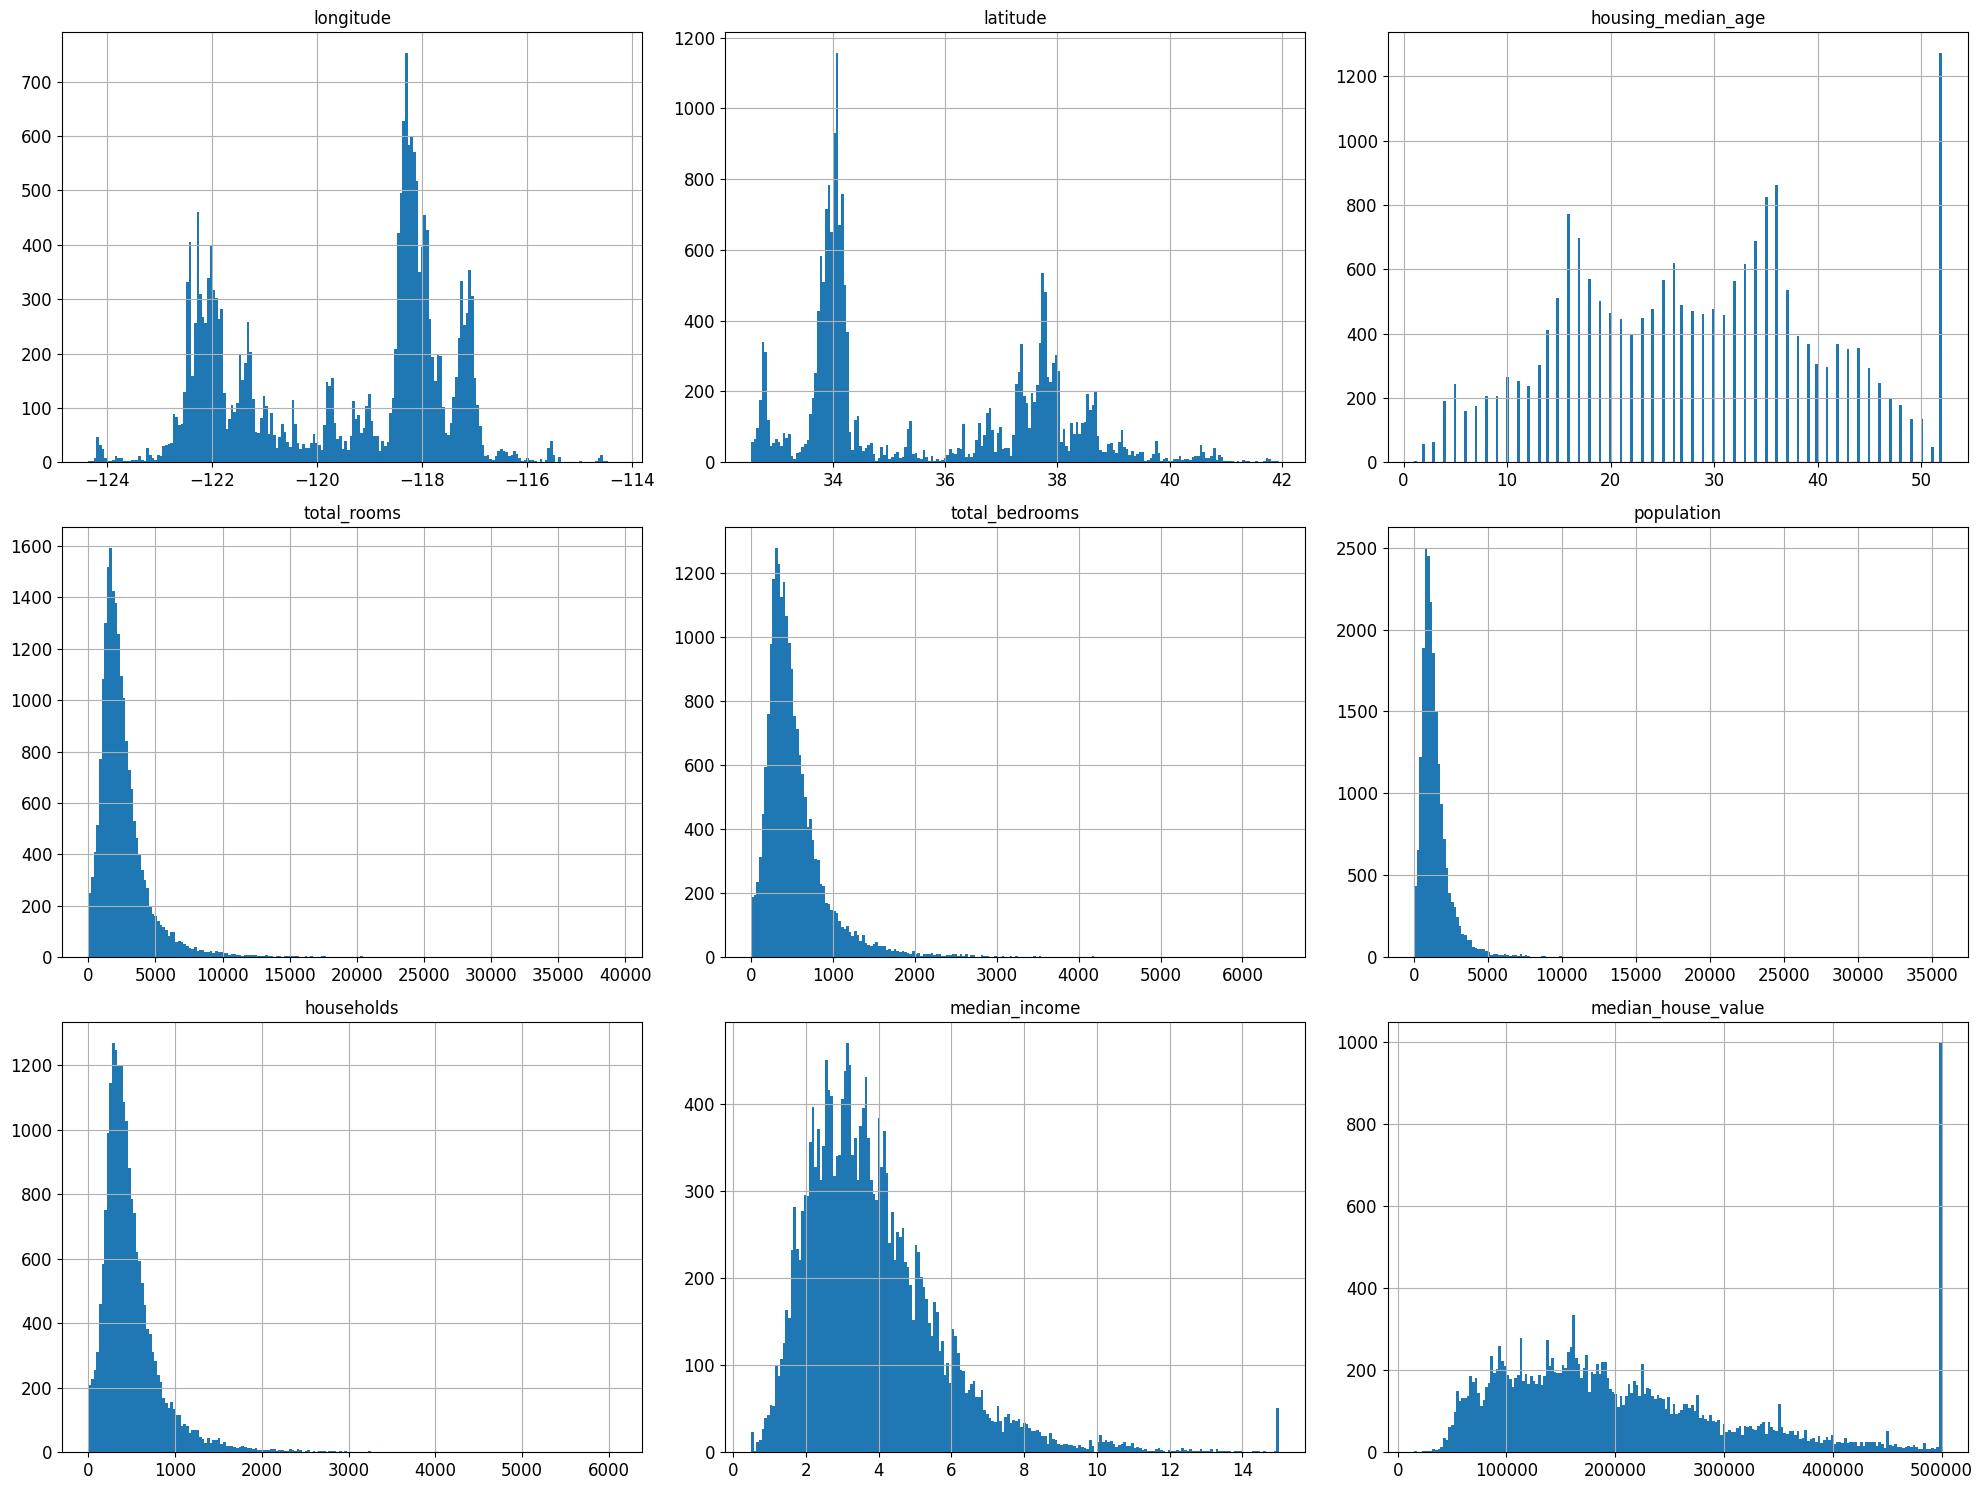

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins=200, figsize=(20,15)) #bins: intervals to divide the range of values into
save_fig("attribute_histogram_plots")
plt.show()



In [11]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [12]:
import numpy as np
#For illustration only. 

def split_train_test_indices(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [13]:
train_set, test_set = split_train_test_indices(housing,0.2)
len(train_set)

16512

In [14]:
from zlib import crc32

# Dung check sum de dinh danh du lieu
# data = b"Hello, world!"  # Data for which CRC checksum will be computed
# data2 = b"Hello, world!"
# crc_value = crc32(data)
# crc_value2 = crc32(data2)      # Compute CRC checksum

# print(f"CRC-32 value: {crc_value} and {crc_value2}")

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff <test_ratio* 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
ids=housing_with_id["index"]

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

In [18]:
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [19]:
# Chia du lieu ra de tranh viec thien kien du lieu, tuc la chia deu so luong du lieu o moi loai tieu bieu
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 



In [20]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [21]:
# Use income_cat to split data
# after we used, let remove it
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall': income_cat_proportions(housing),
    'Stratified': income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100*compare_props["Random"] / compare_props["Overall"] -100
compare_props["Strat. %error"] = 100*compare_props["Stratified"] / compare_props["Overall"] -100



In [22]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis =1, inplace = True)

In [41]:
data_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [31]:
data_train = strat_train_set.copy()

# Trực quan hóa dữ liệu để có thể loại bỏ bớt những thông tin không cần thiết

Saving figure beforeLegend
Saving figure afterlegend


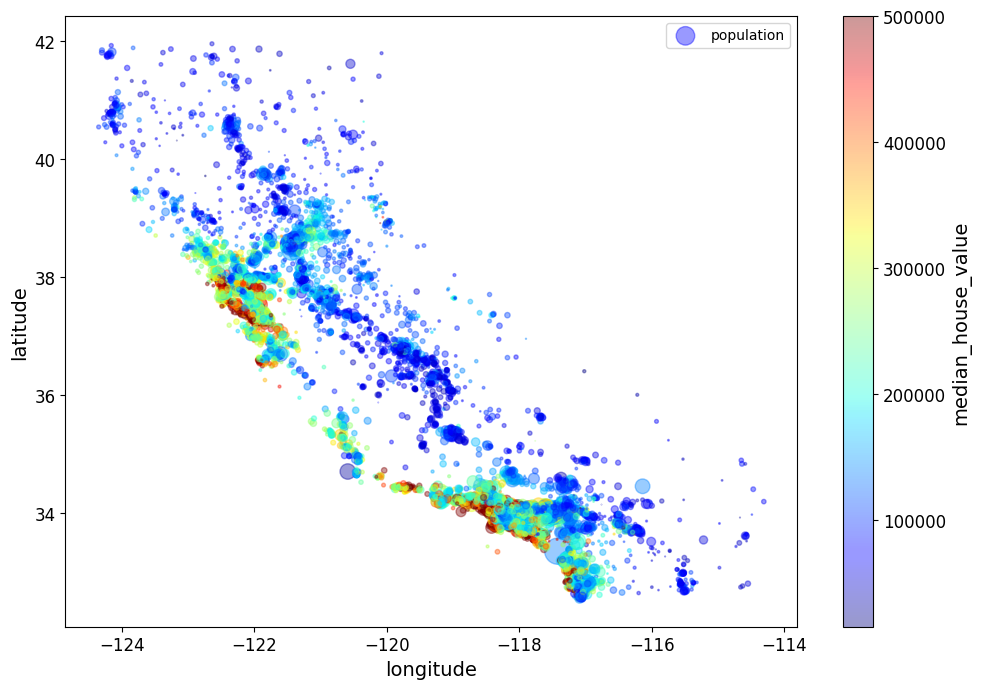

In [53]:
# data_train.plot(kind = "scatter", x="longitude", y="latitude", alpha = 0.1)
data_train.plot(kind='scatter', x="longitude", y="latitude", alpha = 0.4,
                s = data_train["population"]/100, label="population", figsize=(10,7),
                 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()
# We can change the kind of the figure


#Another way to draw the figure

# import matplotlib.image as mpimg
# california_img=mpimg.imread(os.path.join(images_path, filename))
# ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
#                   s=housing['population']/100, label="Population",
#                   c="median_house_value", cmap=plt.get_cmap("jet"),
#                   colorbar=False, alpha=0.4)
# plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
#            cmap=plt.get_cmap("jet"))
# plt.ylabel("Latitude", fontsize=14)
# plt.xlabel("Longitude", fontsize=14)

# prices = housing["median_house_value"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar(ticks=tick_values/prices.max())
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('Median House Value', fontsize=16)

# plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
# plt.show()

No handles with labels found to put in legend.


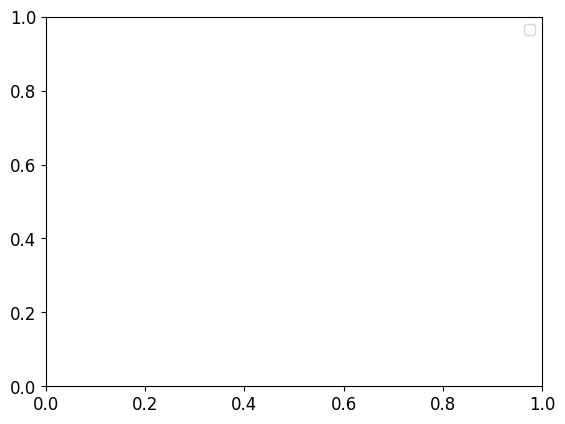

In [51]:
plt.legend()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

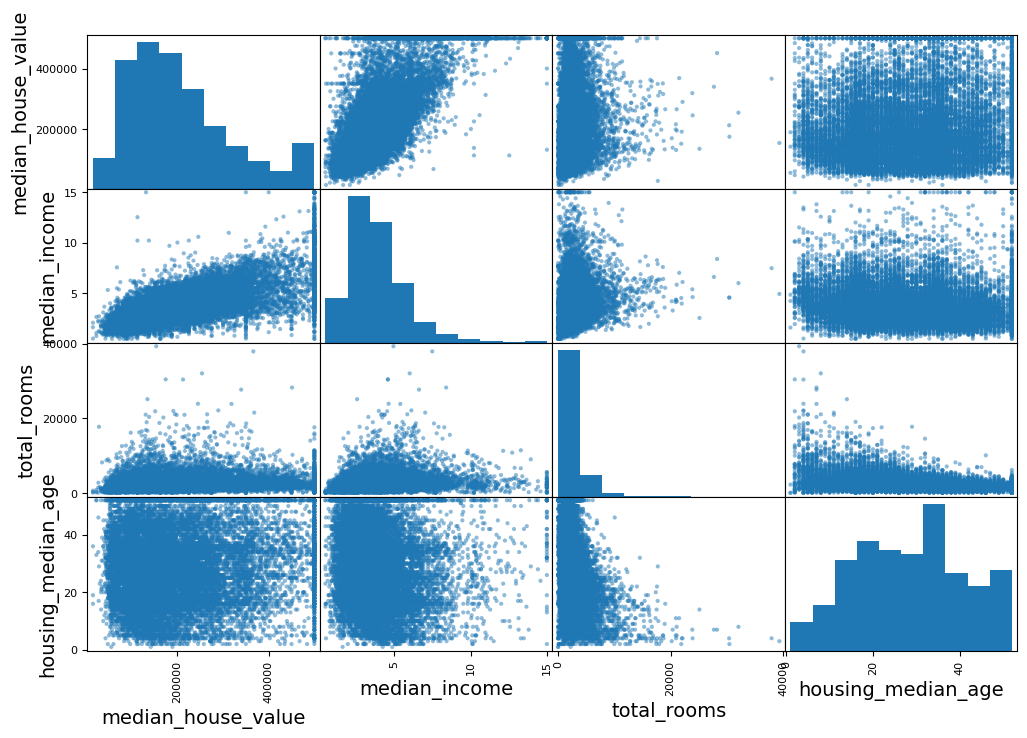

In [56]:
# Find the standard correlation coefficient

corr_matrix = housing.corr()

# Cach khac de kiem tra moi quan he tuong quan giua cac thuoc tinh
from pandas.plotting import scatter_matrix

atributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(data_train[atributes], figsize=(12,8))


# Clean Data vì có rất nhiều data còn thiếu và không được fullfill

In [57]:
# Tach data lay nhan va du lieu
data_trainn= strat_train_set.drop("median_house_value", axis =1)
data_trainn_labels = strat_train_set["median_house_value"].copy()

In [64]:
# # Cach 1
# data_trainn.dropna(subset=["total_bed"])

# # Cách 2
# data_trainn.drop("total_bedrooms",axis=1)

# # Cách 3
# median = housing["total_bedrooms"].median()
# data_trainn["total_bedrooms"].fillna(median, inplace = True)

test_clean = data_trainn[data_trainn.isnull().any(axis=1)].head()

# test_clean.dropna(subset=["total_bedrooms"])

# test_clean.drop("total_bedrooms", axis=1)

median = data_trainn["total_bedrooms"].median()
test_clean["total_bedrooms"].fillna(median, inplace = True)

test_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [66]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
data_trainn_num = data_trainn.drop("ocean_proximity",axis=1)
imputer.fit(data_trainn_num)

SimpleImputer(strategy='median')

In [67]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [69]:
data_trainn_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [70]:
# Ta có tất cả các giá trị trung bình trong imputer
X=imputer.transform(data_trainn_num)

In [74]:
X.shape

(16512, 8)

In [75]:
data_trainn1 = pd.DataFrame(X, columns = data_trainn_num.columns,
                            index=data_trainn_num.index)

In [77]:
data_trainn1.sort_index()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
